In [1]:
import pandas as pd

## Import the small dataset we created and determine possible linear regression configurations

In [2]:
df = pd.read_csv('tmdb_tv_dataset_small.csv')

In [3]:
df.head()

,id,popularity,vote_count,name,first_air_date,backdrop_path,overview,genre_ids,original_name,original_language,...,number_of_episodes,number_of_seasons,origin_country_y,production_companies,production_countries,seasons,spoken_languages,status,tagline,type
0,76773,238.249,550,Station 19,2018-03-22,/PB1agKtni7zo4fea8yk6y4iE5L.jpg,A group of heroic firefighters at Seattle Fire...,"[10759, 18]",Station 19,en,...,46,4,['US'],"[{'id': 34209, 'logo_path': '/chuOOQxixQL4fa9L...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'air_date': '2018-03-22', 'episode_count': 1...","[{'english_name': 'English', 'iso_639_1': 'en'...",Returning Series,Courage under fire.,Scripted
1,71790,230.154,303,S.W.A.T.,2017-11-02,/gJSqr2prvTegFbL0cEWK9Qti3Vs.jpg,A locally born and bred S.W.A.T. lieutenant is...,"[10759, 80, 18]",S.W.A.T.,en,...,71,4,['US'],"[{'id': 11073, 'logo_path': '/wHs44fktdoj6c378...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'air_date': '2017-11-02', 'episode_count': 2...","[{'english_name': 'English', 'iso_639_1': 'en'...",Returning Series,Serve • Protect • Unite,Scripted
2,65494,253.691,647,The Crown,2016-11-04,/4InrdamBEM31unNiuEHGYTPX1e2.jpg,"The gripping, decades-spanning inside story of...",[18],The Crown,en,...,40,4,"['GB', 'US']","[{'id': 5340, 'logo_path': '/zHQ48Hg1In6SJB7WW...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'air_date': '2016-11-04', 'episode_count': 1...","[{'english_name': 'English', 'iso_639_1': 'en'...",Returning Series,Times change. Duty endures.,Scripted
3,60735,231.088,6222,The Flash,2014-10-07,/z59kJfcElR9eHO9rJbWp4qWMuee.jpg,After a particle accelerator causes a freak st...,"[18, 10765]",The Flash,en,...,134,7,['US'],"[{'id': 1957, 'logo_path': '/3T19XSr6yqaLNK8uJ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'air_date': '2016-04-19', 'episode_count': 5...","[{'english_name': 'English', 'iso_639_1': 'en'...",Returning Series,The fastest man alive.,Scripted
4,44006,214.268,965,Chicago Fire,2012-10-10,/W5geO8tq68ng4TsXyZ81phcPiz.jpg,An edge-of-your-seat view into the lives of ev...,[18],Chicago Fire,en,...,182,9,['US'],"[{'id': 26727, 'logo_path': '/jeTxdjXhzgKZyLr3...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'air_date': '2012-10-10', 'episode_count': 2...","[{'english_name': 'English', 'iso_639_1': 'en'...",Returning Series,Feel the heat,Scripted


## Data visualization and Statistics

First, we will investigate the statistics of the dataset we are working with

Data exploration

Whole dataset

- Number of records: SELECT COUNT(*)

For each numeric variable/column

- Mean, median, mode, minimum, maximum

For each categorical variable
- Number of distinct values

For both types of variables
- Histogram
- Number of missing values

In [4]:
# Number of records
len(df.index)

1557

In [5]:
# Number of items (rows x columns)
df.size

51381

In [6]:
# Number of rows, number of columns
df.shape

(1557, 33)

In [7]:
df.dtypes

id                        int64
popularity              float64
vote_count                int64
name                     object
first_air_date           object
backdrop_path            object
overview                 object
genre_ids                object
original_name            object
original_language        object
vote_average            float64
poster_path              object
origin_country_x         object
created_by               object
episode_run_time         object
genres                   object
homepage                 object
in_production              bool
languages                object
last_air_date            object
last_episode_to_air      object
next_episode_to_air      object
networks                 object
number_of_episodes        int64
number_of_seasons         int64
origin_country_y         object
production_companies     object
production_countries     object
seasons                  object
spoken_languages         object
status                   object
tagline 

## From here, we can split the dataset into categorical and numeric columns

In [8]:
all_cols = set(df.columns)
numeric_cols = set(['id','popularity','vote_count','vote_average','number_of_episodes','number_of_seasons'])
categorical_cols = all_cols - numeric_cols

In [9]:
numeric = df[list(numeric_cols)].copy()
categorical = df[list(categorical_cols)].copy()

In [10]:
numeric.head()

,number_of_seasons,popularity,vote_count,id,vote_average,number_of_episodes
0,4,238.249,550,76773,8.2,46
1,4,230.154,303,71790,7.6,71
2,4,253.691,647,65494,8.2,40
3,7,231.088,6222,60735,7.6,134
4,9,214.268,965,44006,8.3,182


In [11]:
numeric.describe()

,number_of_seasons,popularity,vote_count,id,vote_average,number_of_episodes
count,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000
mean,4.712909,30.688473,197.073218,48528.310212,7.096275,166.496468
std,6.316557,25.204725,360.319468,34150.439568,1.556956,522.294566
min,1.000000,9.965000,0.000000,29.000000,0.000000,1.000000
25%,1.000000,17.939000,26.000000,10317.000000,6.800000,18.000000
50%,3.000000,22.861000,87.000000,60654.000000,7.400000,51.000000
75%,5.000000,32.855000,226.000000,76231.000000,7.900000,128.000000
max,62.000000,253.691000,6222.000000,112878.000000,10.000000,7771.000000


In [12]:
numeric.isnull().sum()

number_of_seasons     0
popularity            0
vote_count            0
id                    0
vote_average          0
number_of_episodes    0
dtype: int64

In [13]:
categorical.describe()

,last_episode_to_air,homepage,production_countries,original_name,status,poster_path,production_companies,networks,in_production,original_language,...,type,origin_country_y,seasons,origin_country_x,episode_run_time,created_by,tagline,languages,name,genre_ids
count,1554,1192,1557,1557,1557,1533,1557,1557,1557,1557,...,1557,1557,1557,1557,1557,1557,318,1557,1557,1557
unique,1554,1192,83,1541,6,1533,1001,421,2,24,...,7,61,1557,61,191,1232,318,91,1538,327
top,"{'air_date': '2019-08-14', 'episode_number': 1...",https://www.netflix.com/de-en/title/80017537,"[{'iso_3166_1': 'US', 'name': 'United States o...",The Twilight Zone,Ended,/gBnbkQ7t6Ctri0A4nKDYWqIVF3f.jpg,[],"[{'name': 'Netflix', 'id': 213, 'logo_path': '...",False,en,...,Scripted,['US'],"[{'air_date': '2002-09-18', 'episode_count': 4...",['US'],[24],[],In the complex process of determining guilt an...,['en'],The Twilight Zone,[18]
freq,1,1,469,4,893,1,348,119,1058,1006,...,1384,828,1,828,172,326,1,905,4,183


In [14]:
categorical.isnull().sum()

last_episode_to_air        3
homepage                 365
production_countries       0
original_name              0
status                     0
poster_path               24
production_companies       0
networks                   0
in_production              0
original_language          0
genres                     0
spoken_languages           0
first_air_date             0
overview                  54
next_episode_to_air     1451
backdrop_path             94
last_air_date              3
type                       0
origin_country_y           0
seasons                    0
origin_country_x           0
episode_run_time           0
created_by                 0
tagline                 1239
languages                  0
name                       0
genre_ids                  0
dtype: int64

In [16]:
import matplotlib.pyplot as plt

(array([ 35.,  12.,   9.,   8.,  25.,  63., 314., 718., 352.,  21.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

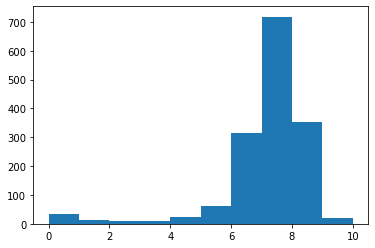

In [17]:
# Histogram of vote_average (current target we are looking at)
plt.hist(numeric['vote_average'])

(array([487.,   0., 893.,   0., 166.,   0.,   9.,   0.,   1.,   1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

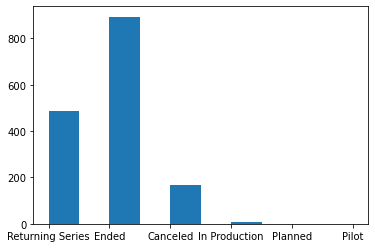

In [18]:
# Histogram of vote_count (current target we are looking at)
plt.hist(categorical['status'])

## Visualizing correlation between vote_average and other numeric variables

Text(0, 0.5, 'vote_average')

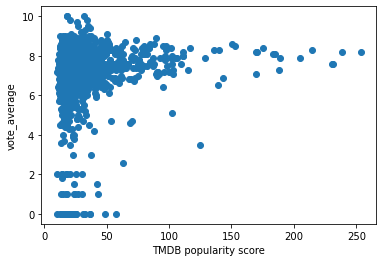

In [19]:
# popularity vs vote_average
plt.scatter(numeric['popularity'],numeric['vote_average'])

#label
plt.xlabel("TMDB popularity score")
plt.ylabel('vote_average')

Based on this, we can see that there is little correlation between the TMDB assigned popularity score and the vote_average. Additionally, the popularity metric is actually an assigned value from TMDB which is calculated based on internal metrics, and changes daily. Thus, we can safely ignore this variable as a potential explanatory variable

Text(0, 0.5, 'vote_average')

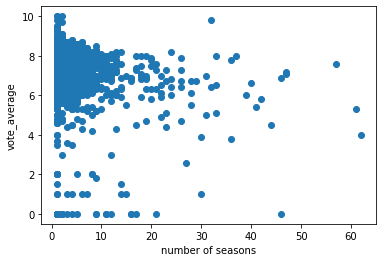

In [20]:
# popularity vs vote_average
plt.scatter(numeric['number_of_seasons'],numeric['vote_average'])

#label
plt.xlabel("number of seasons")
plt.ylabel('vote_average')

Text(0, 0.5, 'vote_average')

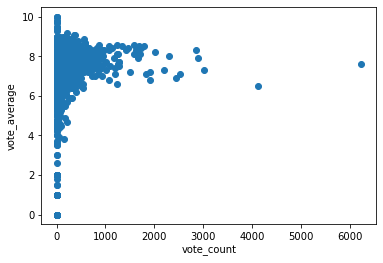

In [21]:
# popularity vs vote_average
plt.scatter(numeric['vote_count'],numeric['vote_average'])

#label
plt.xlabel("vote_count")
plt.ylabel('vote_average')

Text(0, 0.5, 'vote_average')

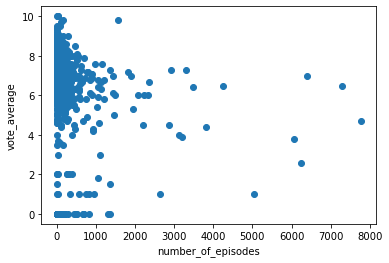

In [22]:
# popularity vs vote_average
plt.scatter(numeric['number_of_episodes'],numeric['vote_average'])

#label
plt.xlabel("number_of_episodes")
plt.ylabel('vote_average')

## Visualizing correlation between vote count and other numeric variables

Text(0, 0.5, 'vote_count')

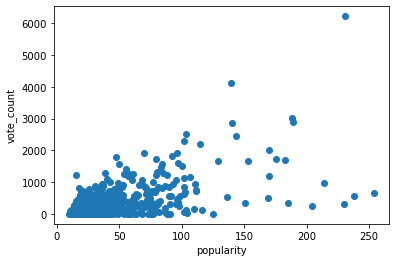

In [23]:
# popularity vs vote_average
plt.scatter(numeric['popularity'],numeric['vote_count'])

#label
plt.xlabel("popularity")
plt.ylabel('vote_count')

Text(0, 0.5, 'vote_count')

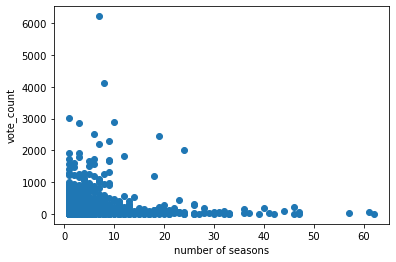

In [24]:
# popularity vs vote_average
plt.scatter(numeric['number_of_seasons'],numeric['vote_count'])

#label
plt.xlabel("number of seasons")
plt.ylabel('vote_count')

Text(0, 0.5, 'vote_count')

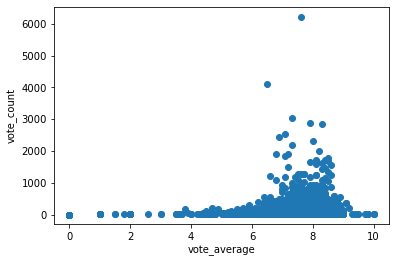

In [25]:
# popularity vs vote_average
plt.scatter(numeric['vote_average'],numeric['vote_count'])

#label
plt.xlabel("vote_average")
plt.ylabel('vote_count')

Text(0, 0.5, 'vote_count')

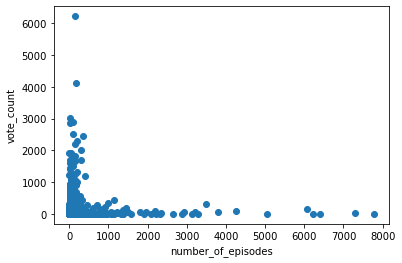

In [26]:
# popularity vs vote_average
plt.scatter(numeric['number_of_episodes'],numeric['vote_count'])

#label
plt.xlabel("number_of_episodes")
plt.ylabel('vote_count')

Based on this, we can conclude that although there is some more correlation between vote count and other numeric variables, the strongest predictors are vote_average and popularity, both of which seem to be proprietary to TMDB, and as such the predicting power may not be replicated when looking at more standardized datasets (IMDB, Netflix, etc.)

From these findings, it seems to be worthwhile to pursue classification 

## Decision tree to predict if a TV shows current status

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Since we lack intuition regarding which columns have predictive correlation to the column we wish to predict, in this case 'status', we will explore all of the columns that we have in the full dataset right now 

In [28]:
train, test = train_test_split(df,test_size=0.15)

In [29]:
# Custom Color Palette 
red_blue = ['#19B5FE','#EF4836']
pallete = sns.color_palette(red_blue)
sns.set_palette(pallete)
sns.set_style('white')

Lets take a look at the distinct values of the 'status' column

In [30]:
statuses = df.drop_duplicates(subset=['status'])['status']

In [31]:
statuses

0       Returning Series
7                  Ended
32              Canceled
284        In Production
366              Planned
1419               Pilot
Name: status, dtype: object

From our previous histogram, we can see that the main statuses we would be interested in here for this discovery are 'ended', 'cancelled', or 'in production'. Intuitively, some of the most probable explanatory variables are 'vote_count', 'first_air_date', 'original_language', 'vote_average', 'episode_run_time', 'genres', 'number_of_episodes', 'number_of_seasons', 'production_companies', and 'production_countries'

In [32]:
# vote_count
ended_vote_count = df[df['status'] == 'Ended']['vote_count']
cancelled_vote_count = df[df['status'] == 'Canceled']['vote_count']
in_prod_vote_count = df[df['status'] == 'In Production']['vote_count']

# first_air_date
ended_first_air_date = df[df['status'] == 'Ended']['first_air_date']
cancelled_first_air_date = df[df['status'] == 'Canceled']['first_air_date']
in_prod_first_air_date = df[df['status'] == 'In Production']['first_air_date']

# original_language
ended_original_language = df[df['status'] == 'Ended']['original_language']
cancelled_original_language = df[df['status'] == 'Canceled']['original_language']
in_prod_original_language = df[df['status'] == 'In Production']['original_language']

# vote_average
ended_vote_average = df[df['status'] == 'Ended']['vote_average']
cancelled_vote_average = df[df['status'] == 'Canceled']['vote_average']
in_prod_vote_average = df[df['status'] == 'In Production']['vote_average']

# episode_run_time
ended_episode_run_time = df[df['status'] == 'Ended']['episode_run_time']
cancelled_episode_run_time = df[df['status'] == 'Canceled']['episode_run_time']
in_prod_episode_run_time = df[df['status'] == 'In Production']['episode_run_time']

# genres
ended_genres = df[df['status'] == 'Ended']['genres']
cancelled_genres = df[df['status'] == 'Canceled']['genres']
in_prod_genres = df[df['status'] == 'In Production']['genres']

# number_of_episodes
ended_number_of_episodes = df[df['status'] == 'Ended']['number_of_episodes']
cancelled_number_of_episodes = df[df['status'] == 'Canceled']['number_of_episodes']
in_prod_number_of_episodes = df[df['status'] == 'In Production']['number_of_episodes']

# number_of_seasons
ended_number_of_seasons = df[df['status'] == 'Ended']['number_of_seasons']
cancelled_number_of_seasons = df[df['status'] == 'Canceled']['number_of_seasons']
in_prod_number_of_seasons = df[df['status'] == 'In Production']['number_of_seasons']

# production_companies
ended_production_companies = df[df['status'] == 'Ended']['production_companies']
cancelled_production_companies = df[df['status'] == 'Canceled']['production_companies']
in_prod_production_companies = df[df['status'] == 'In Production']['production_companies']

# production_countries
ended_production_countries = df[df['status'] == 'Ended']['production_countries']
cancelled_production_countries = df[df['status'] == 'Canceled']['production_countries']
in_prod_production_countries = df[df['status'] == 'In Production']['production_countries']

## Some visualizations here

In [33]:
c = DecisionTreeClassifier(min_samples_split=100)

In [34]:
# one hot encode categorical features
categorical_features = ['original_language', 'genres', 'production_companies', 'production_countries']

In [35]:
features = ['vote_count', 'original_language', 'vote_average', 'episode_run_time', 'genres', 'number_of_episodes', 'number_of_seasons', 'production_companies', 'production_countries']

In [36]:
X_train = train[features]
y_train = train['status']

X_test = test[features]
y_test = test['status']

In [37]:
c.fit(X_train,y_train)

ValueError: could not convert string to float: 'de'

## Linear regression to predict number of votes

A naive approach that we can take here to get a sense of features that might be good predictors of an overall "popularity" measurement can be to test on existing data, i.e. vote_count. Vote count as the sole descriptor of the overall popularity of a TV show may not be the most accurate, however it can be a good starting point.

In [ ]:
# Histogram of vote_count (current target we are looking at)
plt.hist(numeric['vote_average'])